<a href="https://www.kaggle.com/code/sonawanelalitsunil/smartphone-sales-prediction?scriptVersionId=206277817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphone-sales/smartphones.csv


# Smartphone Sales Analysis and Trends

# Project Overview
**The smartphone industry is one of the fastest-evolving markets globally, with continuous innovations driving consumer demand. This project examines smartphone sales data to uncover trends, identify growth factors, and predict future sales patterns. By analyzing data from multiple regions and time periods, the project aims to provide actionable insights for stakeholders in the smartphone industry.**

# Key Objectives :-
### Market Trends Identification:
Analyze sales trends over time to understand seasonal patterns and overall growth or decline in different regions.

### Feature Influence:
Evaluate which features (e.g., camera quality, battery life, storage) most influence consumer purchasing decisions, leveraging correlation analysis between sales and product specifications.

### Competitor Analysis:
Examine the market share and growth rate of different brands to see how flagship releases and innovations impact overall sales.

### Predictive Modeling: 
Build a predictive model to forecast future smartphone sales, aiding manufacturers and retailers in better inventory management and marketing strategies.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/smartphone-sales/smartphones.csv')

In [4]:
data.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [5]:
data.tail()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00
1815,Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre,Xiaomi,Note 9S,6.0,128.0,Gray,Yes,289.00


In [6]:
data.shape

(1816, 8)

In [7]:
data.describe

<bound method NDFrame.describe of                                             Smartphone     Brand  \
0                   Realme C55 8/256GB Sunshower Libre    Realme   
1             Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung   
2         Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola   
3             Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi   
4              Nothing Phone (2) 12/512GB Blanco Libre   Nothing   
...                                                ...       ...   
1811             Xiaomi Redmi Note 8 4/64GB Azul Libre    Xiaomi   
1812   Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre    Xiaomi   
1813          Xiaomi Redmi Note 9 4/128GB Blanco Libre    Xiaomi   
1814   Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre    Xiaomi   
1815  Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre    Xiaomi   

               Model   RAM  Storage   Color Free  Final Price  
0                C55   8.0    256.0  Yellow  Yes       231.60  
1         Galaxy M23 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM,1333.0,5.960990,2.668070,1.00,4.00,6.00,8.0000,12.00
Storage,1791.0,162.652150,139.411605,2.00,64.00,128.00,256.0000,1000.00
Final Price,1816.0,492.175573,398.606183,60.46,200.99,349.99,652.7175,2271.28


In [10]:
data.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
catagory_cols = [col for col in data.columns if str(data[col].dtypes) in ["object", "category", "bool"]]

In [13]:
catagory_cols

['Smartphone', 'Brand', 'Model', 'Color', 'Free']

In [14]:
num = [col for col in data.columns if col not in catagory_cols]

num

['RAM', 'Storage', 'Final Price']

In [15]:
def cat_summary(dataframe, col_name):
    # Create a DataFrame to hold counts and ratios for each unique value
    summary_df = pd.DataFrame({
        "Count": dataframe[col_name].value_counts(),  # Count of each unique value
        "Ratio (%)": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value
    })
    
    # Print the summary DataFrame and a separator line for clarity
    print(f"Summary of '{col_name}' column:")
    print(summary_df)
    print("-" * 70)  # Separator line for readability

# Loop through each categorical column and display its summary
for col in catagory_cols:
    cat_summary(data, col)

Summary of 'Smartphone' column:
                                                  Count  Ratio (%)
Smartphone                                                        
Realme C55 8/256GB Sunshower Libre                    1   0.055066
Samsung Galaxy A53 5G 8/256GB Azul Libre              1   0.055066
Huawei P30 Pro 8/128GB Breathing Crystal Libre        1   0.055066
Huawei Nova 10 8/128GB Plata Libre                    1   0.055066
Samsung Galaxy A21s 3/32GB Negro Libre                1   0.055066
...                                                 ...        ...
Samsung Galaxy Note 10 Plus 256GB Blanco Libre        1   0.055066
Cubot P80 8/256GB Morado Libre                        1   0.055066
Huawei P30 Pro 8/128GB Black Libre                    1   0.055066
Apple iPhone XS Max 256Gb Gris Espacial Libre         1   0.055066
Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre      1   0.055066

[1816 rows x 2 columns]
----------------------------------------------------------------------
S

#### columns oragnizing

In [16]:
data.sample()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
1215,Xiaomi Redmi Note 9 3/64GB Gris Libre,Xiaomi,Redmi Note 9,3.0,64.0,Gray,Yes,109.0


In [17]:
data.columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final Price'],
      dtype='object')

In [18]:
data.columns = data.columns.str.lower()

In [19]:
data.columns = ['smartphone', 'brand', 'model', 'ram', 'storage', 'color', 'free','final price']

In [20]:
data.drop(columns = "smartphone", axis=0, inplace= True)

In [21]:
data.head(5)

,brand,model,ram,storage,color,free,final price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [22]:
data['free'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
data['free'].value_counts()

free
Yes    1772
No       44
Name: count, dtype: int64

In [24]:
data[data.free == "No" ].shape

(44, 7)

In [25]:
data[data.free == "Yes" ].shape

(1772, 7)

In [26]:
print(data.columns)

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'final price'], dtype='object')


In [27]:
type(data)

pandas.core.frame.DataFrame

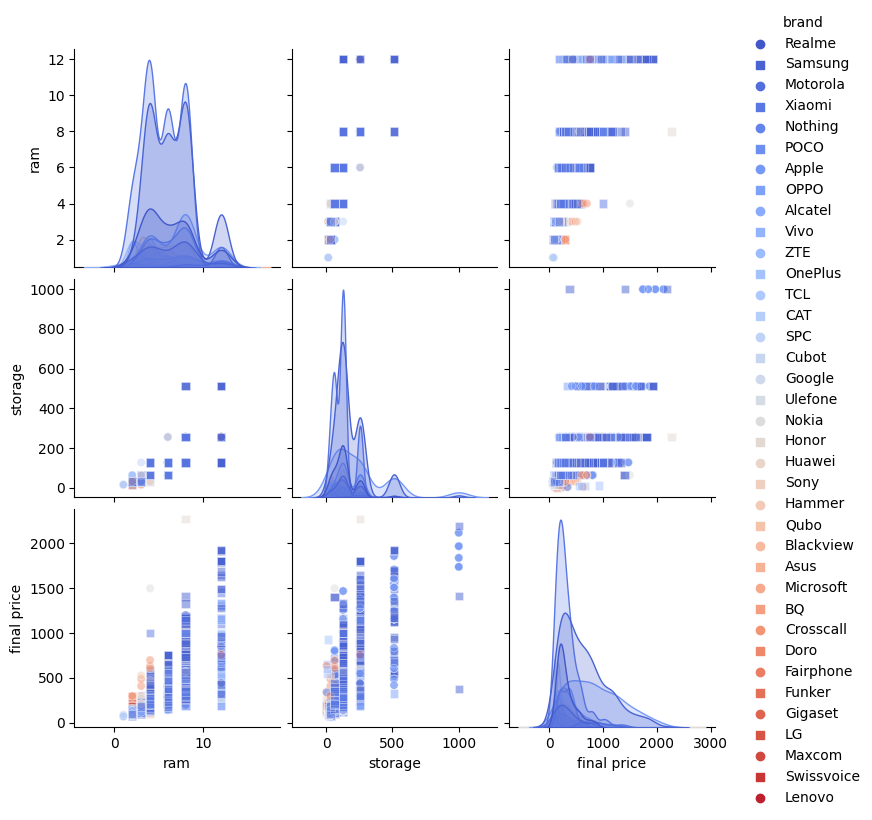

In [28]:
# Assuming 'data' is your DataFrame with numerical columns
sns.pairplot(data, 
             hue="brand",  # Use a single column, such as 'brand', for coloring
             palette="coolwarm",    # Color palette for different categories
             markers=["o", "s"],    # Customize marker shapes
             diag_kind="kde",       # Use KDE for the diagonal plots
             plot_kws={'alpha': 0.5})  # Adjust transparency for clarity
             
plt.show()

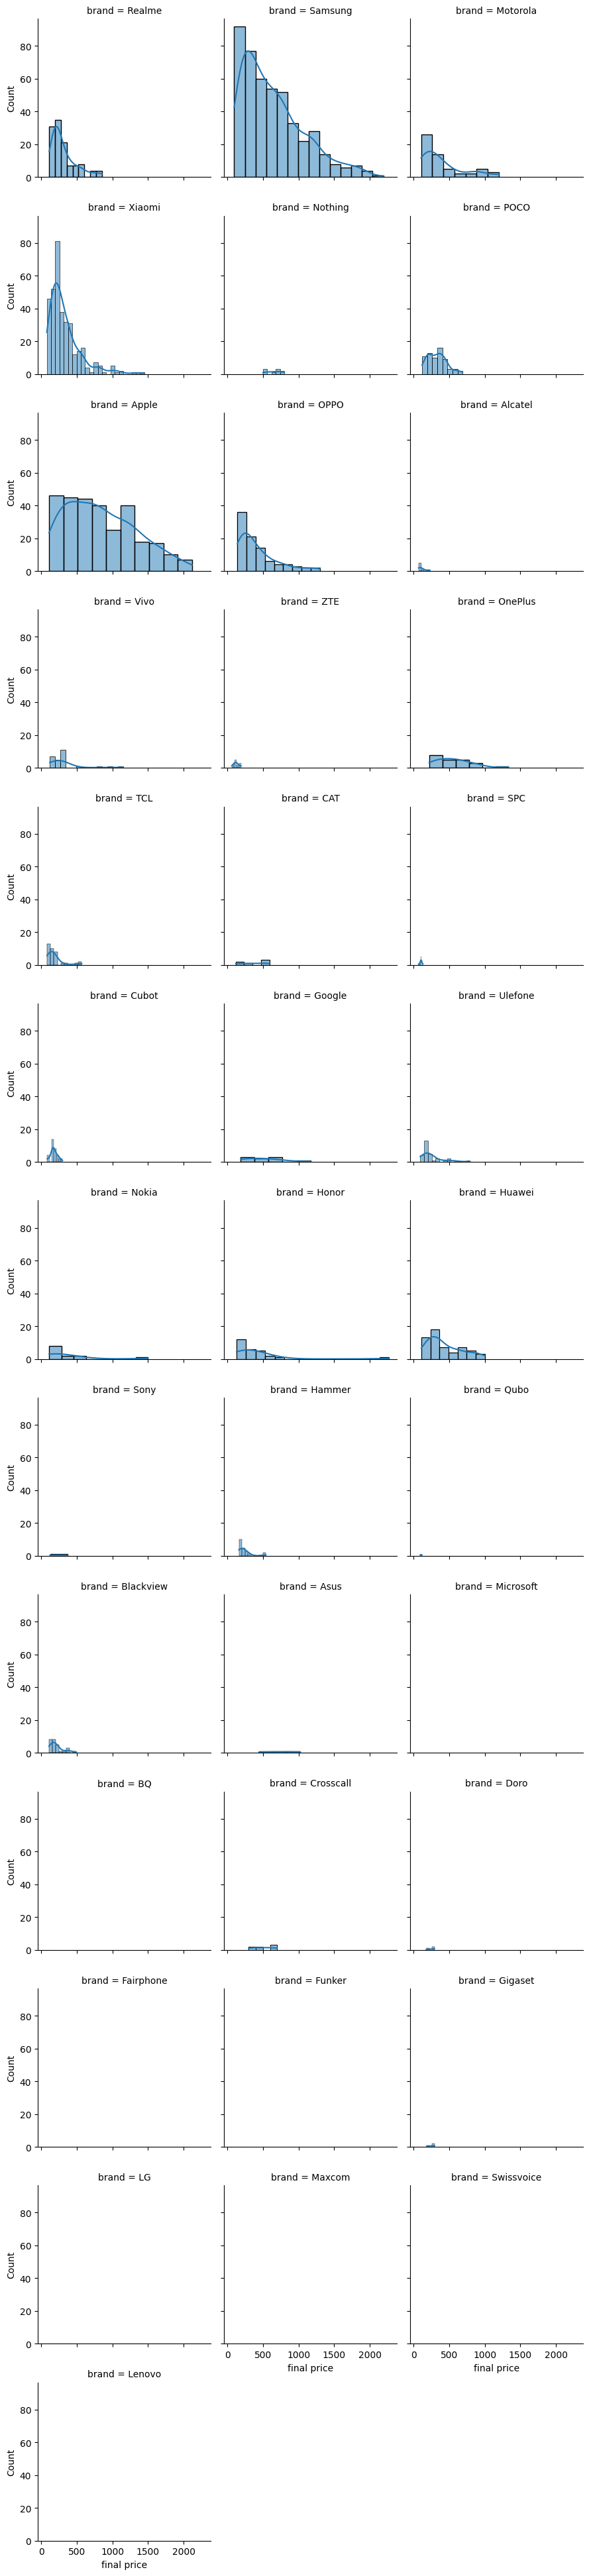

In [29]:
# Example: FacetGrid with categories in separate plots (e.g., 'brand')
g = sns.FacetGrid(data, col="brand", col_wrap=3)
g.map_dataframe(sns.histplot, x="final price", kde=True)
plt.show()


In [30]:
data.model.nunique()

383

In [31]:
data.ram.value_counts()

ram
8.0     381
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64

#### finding Duplicated columns presented in dataset

In [32]:
data.duplicated().sum()

16

In [33]:
data.drop_duplicates(inplace = True)

In [34]:
data.duplicated().sum()

0

In [35]:
import missingno as msno

<Axes: >

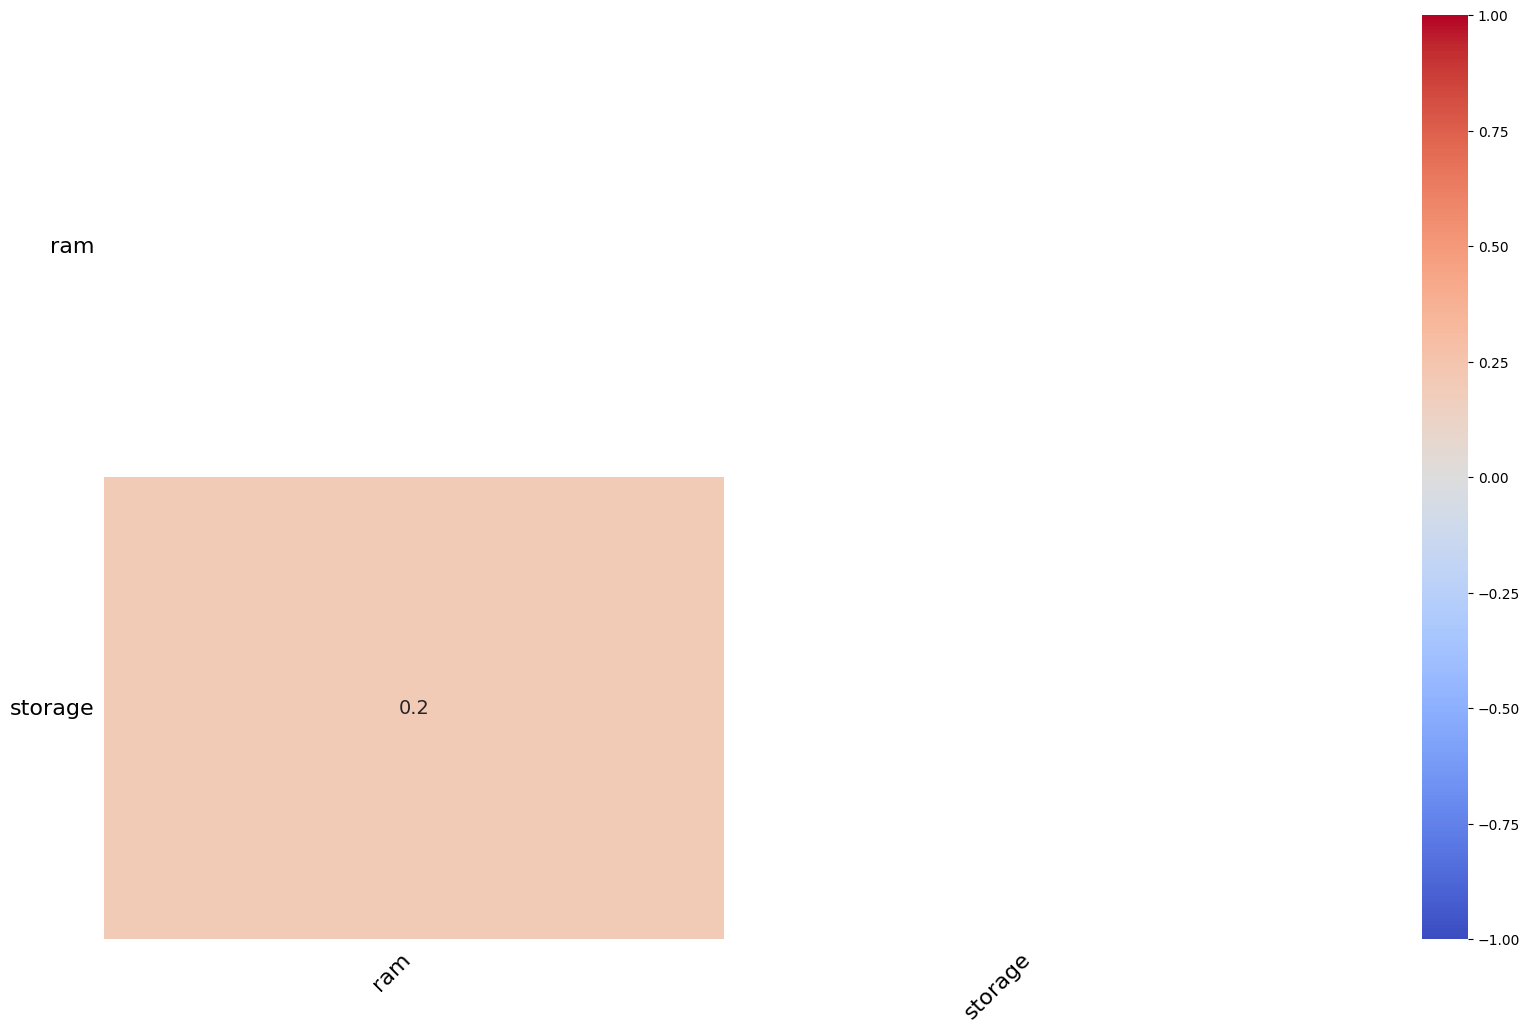

In [36]:
msno.heatmap(data, cmap="coolwarm")


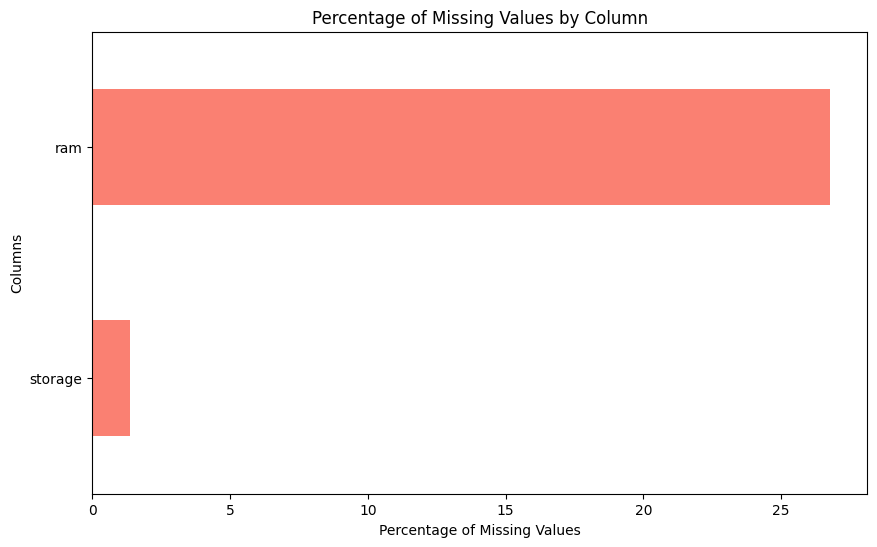

In [37]:
# Calculate missing values
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()

# Plot
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='barh', color='salmon')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
plt.show()

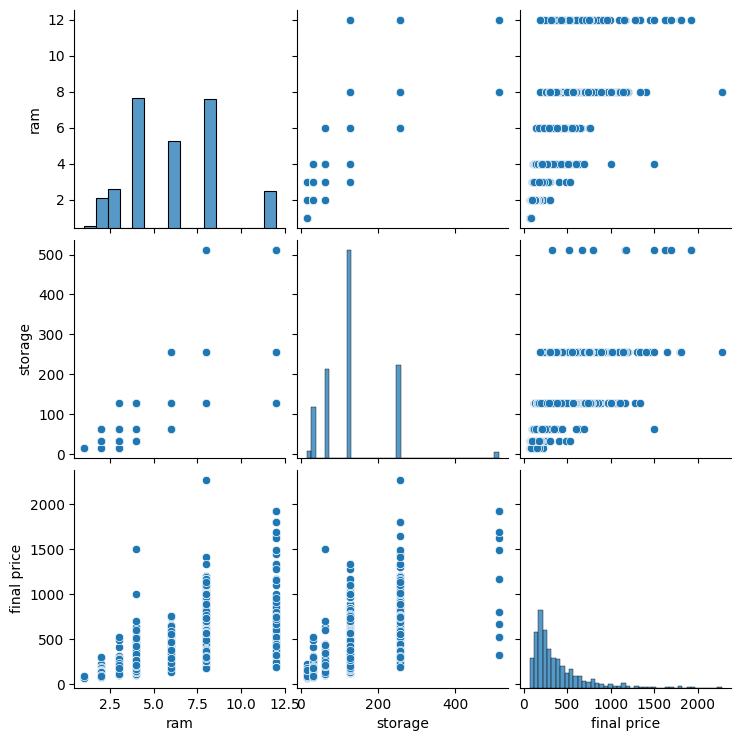

In [38]:
# Pairplot while removing rows with missing values for simplicity
sns.pairplot(data.dropna())
plt.show()

In [39]:
data.sample(10)

,brand,model,ram,storage,color,free,final price
1052,SPC,Smart 2,1.0,16.0,Red,Yes,70.68
1281,Apple,iPhone 7,NaN,32.0,Pink,Yes,155.00
56,Samsung,Galaxy A54,8.0,128.0,Black,Yes,377.96
1462,Xiaomi,M5s,4.0,128.0,Black,Yes,249.90
73,Motorola,Moto E13,2.0,64.0,Black,Yes,119.00
97,Xiaomi,11 Pro,8.0,256.0,Blue,Yes,449.99
360,TCL,40 SE,4.0,128.0,Gray,Yes,163.59
1109,Motorola,Edge 20,12.0,256.0,Blue,Yes,618.21
355,Xiaomi,Redmi Note 12,4.0,64.0,Blue,Yes,229.99
1317,Blackview,BL5000,8.0,128.0,Black,Yes,319.98


In [40]:
data.groupby("model")[["storage"]].mean().round()

,storage
model,
1 (2021),16.0
10,141.0
10 AMOLED,192.0
11 Lite,128.0
11 Pro,203.0
...,...
iPhone 8,151.0
iPhone SE,152.0
iPhone X,128.0


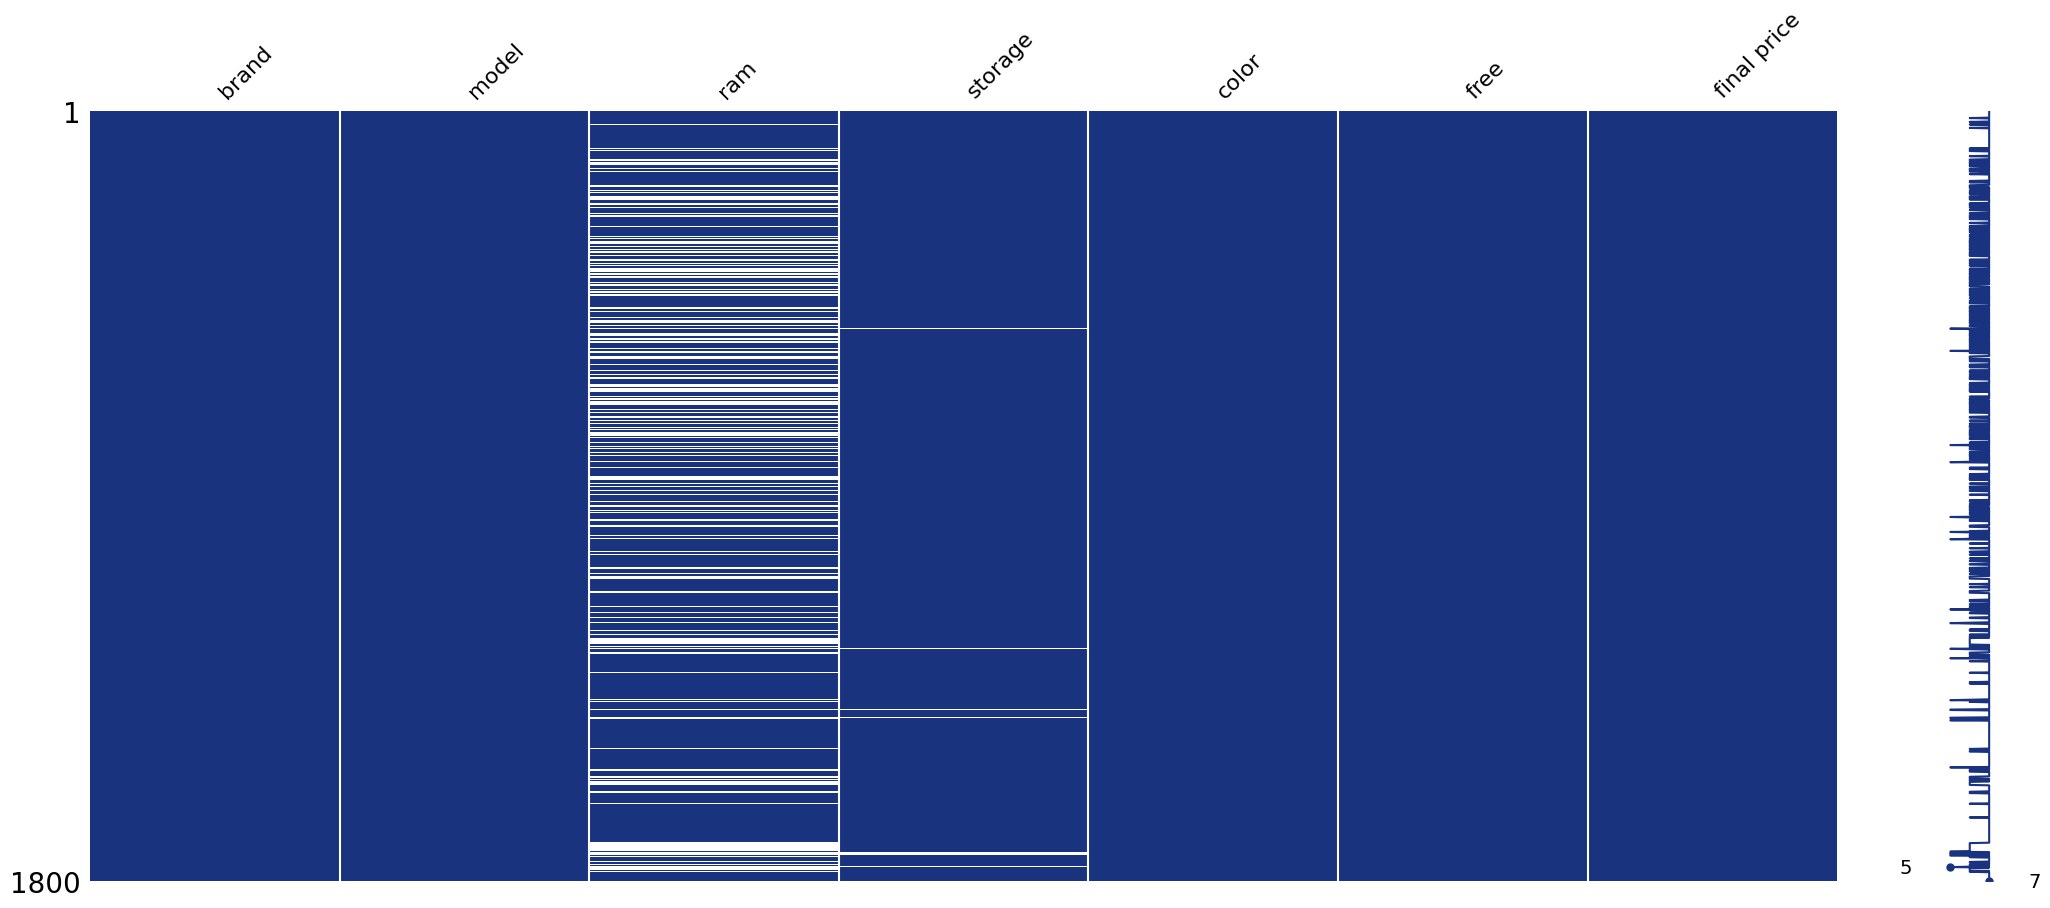

In [41]:
# Customize the missing data matrix visualization with a new color format
msno.matrix(data, color=(0.1, 0.2, 0.5))  # Custom RGB color format
plt.show()

In [42]:
# Fill missing values in 'storage' by calculating the average based on 'model'
data.ram.fillna(data.groupby("model")["ram"].transform("mean").round(),inplace = True)


In [43]:
data.ram.isnull().sum()

392

In [44]:
data.storage.isnull().sum()

25

In [45]:
data.groupby(["brand", "storage"])["ram"].apply(lambda x: x.mode())

brand    storage   
Alcatel  16.0     0    1.0
         32.0     0    2.0
         64.0     0    6.0
Apple    64.0     0    7.0
         256.0    0    7.0
                      ... 
Xiaomi   128.0    0    6.0
         256.0    0    8.0
ZTE      32.0     0    2.0
         64.0     0    3.0
         128.0    0    4.0
Name: ram, Length: 113, dtype: float64

### mode of RAM models based on brands

In [46]:
data['ram'].fillna(data.groupby(['brand', 'storage'])['ram'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),inplace = True)

In [47]:
data.ram.isnull().sum()

130

In [48]:
data.dropna(inplace = True)

In [49]:
data.isnull().sum()

brand          0
model          0
ram            0
storage        0
color          0
free           0
final price    0
dtype: int64

In [50]:
numeric_data = data.select_dtypes(include='number')

In [51]:
numeric_data.sample(10)

,ram,storage,final price
1570,7.0,128.0,889.65
429,6.0,128.0,329.99
938,2.0,32.0,96.22
536,2.0,32.0,79.99
625,6.0,128.0,219.00
535,7.0,256.0,731.60
1109,12.0,256.0,618.21
284,8.0,128.0,599.00
1599,8.0,128.0,965.20
1022,8.0,128.0,625.24


In [52]:
data.select_dtypes(include='number').columns

Index(['ram', 'storage', 'final price'], dtype='object')

In [53]:
def outliers(data):
    for col in data.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Detect outliers (values below Q1 - 3 * IQR or above Q3 + 3 * IQR)
        outliers = data[(data[col] < (Q1 - 3 * IQR)) | (data[col] > (Q3 + 3 * IQR))]

        # Print the number of outliers for each column
        print(f"{col} - Outliers:")
        print(f"Number of Outliers: {outliers.shape[0]}")
        print(outliers[[col]])

In [54]:
def outliers(df):
    for col in df.select_dtypes(include='number').columns:
        # Calculate IQR and detect outliers
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR))]
        
        # Output results
        print(f"{col} - Outliers count: {outliers.shape[0]}")


In [55]:
outliers(data)

ram - Outliers count: 0
storage - Outliers count: 0
final price - Outliers count: 5


In [56]:
print(data.columns)

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'final price'], dtype='object')


In [57]:
data[data['final price'] < 2000]

,brand,model,ram,storage,color,free,final price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...
1811,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


In [58]:
data[data['final price'] > 2000]

,brand,model,ram,storage,color,free,final price
1380,Honor,Magic4,8.0,256.0,Turquoise,Yes,2271.28


In [59]:
data[data.model == "iPhone 14"]

,brand,model,ram,storage,color,free,final price
25,Apple,iPhone 14,7.0,256.0,Black,Yes,1599.00
90,Apple,iPhone 14,7.0,256.0,Gold,Yes,1599.00
93,Apple,iPhone 14,7.0,256.0,Silver,Yes,1599.00
116,Apple,iPhone 14,7.0,256.0,Purple,Yes,1289.00
129,Apple,iPhone 14,7.0,256.0,Red,Yes,1289.00
135,Apple,iPhone 14,7.0,512.0,Black,Yes,1709.00
136,Apple,iPhone 14,7.0,256.0,Purple,Yes,1449.00
167,Apple,iPhone 14,7.0,256.0,Blue,Yes,1139.00
174,Apple,iPhone 14,7.0,256.0,Black,Yes,1259.01
175,Apple,iPhone 14,7.0,512.0,Silver,Yes,1709.00


# Data Visualization

In [60]:
data.columns

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'final price'], dtype='object')

In [61]:
number_of_sold_brand = data.groupby("brand").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)

In [62]:
number_of_sold_brand

,brand,count
27,Samsung,438
32,Xiaomi,347
1,Apple,192
25,Realme,116
21,OPPO,92
23,POCO,67
18,Motorola,50
13,Huawei,48
29,TCL,36
6,Cubot,33


In [63]:
top_10_brands = number_of_sold_brand[0:11]

In [64]:
top_10_brands

,brand,count
27,Samsung,438
32,Xiaomi,347
1,Apple,192
25,Realme,116
21,OPPO,92
23,POCO,67
18,Motorola,50
13,Huawei,48
29,TCL,36
6,Cubot,33


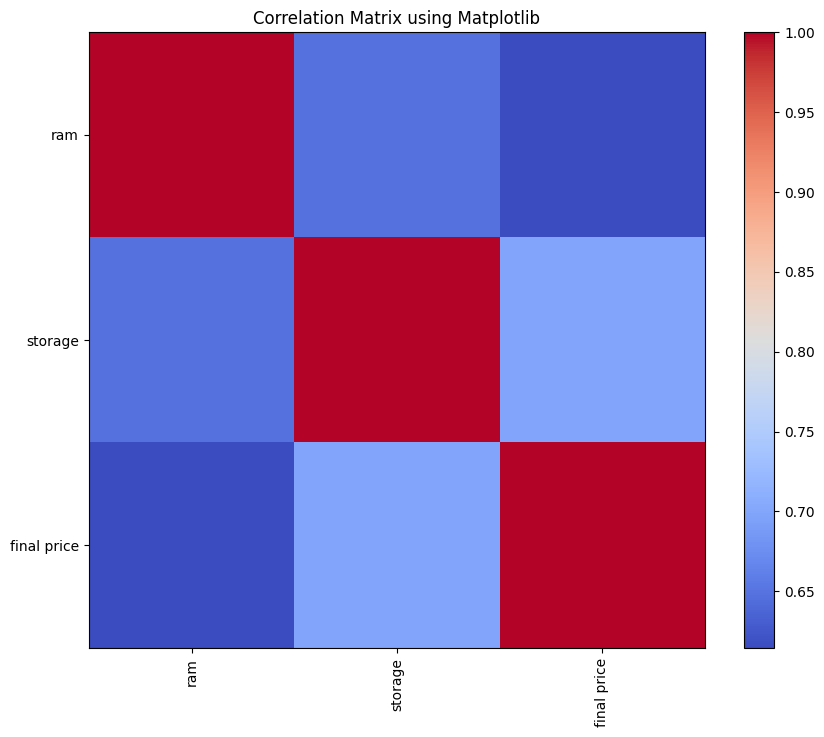

In [65]:
# Calculate the correlation matrix
corr = numeric_data.corr()

# Plot the correlation matrix using imshow
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix using Matplotlib")
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.show()

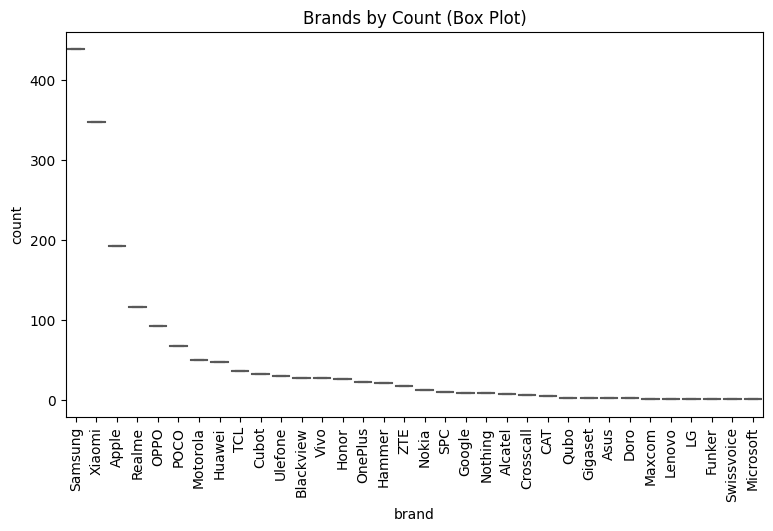

In [66]:
plt.figure(figsize=(9,5))

sns.boxplot(x="brand", y="count", data=number_of_sold_brand, palette="Set2")

plt.xticks(rotation=90)

plt.title("Brands by Count (Box Plot)")

plt.show()


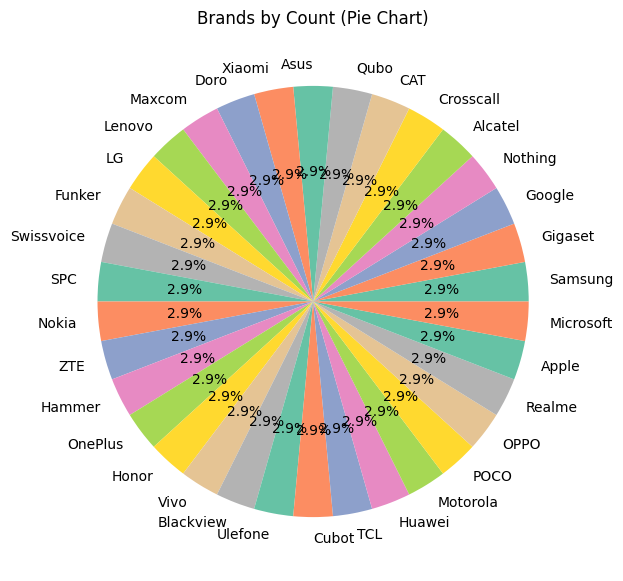

In [67]:
# Calculate the proportions
brand_counts = number_of_sold_brand['brand'].value_counts()

plt.figure(figsize=(7,7))

# Plotting pie chart
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(brand_counts)))

plt.title("Brands by Count (Pie Chart)")

plt.show()


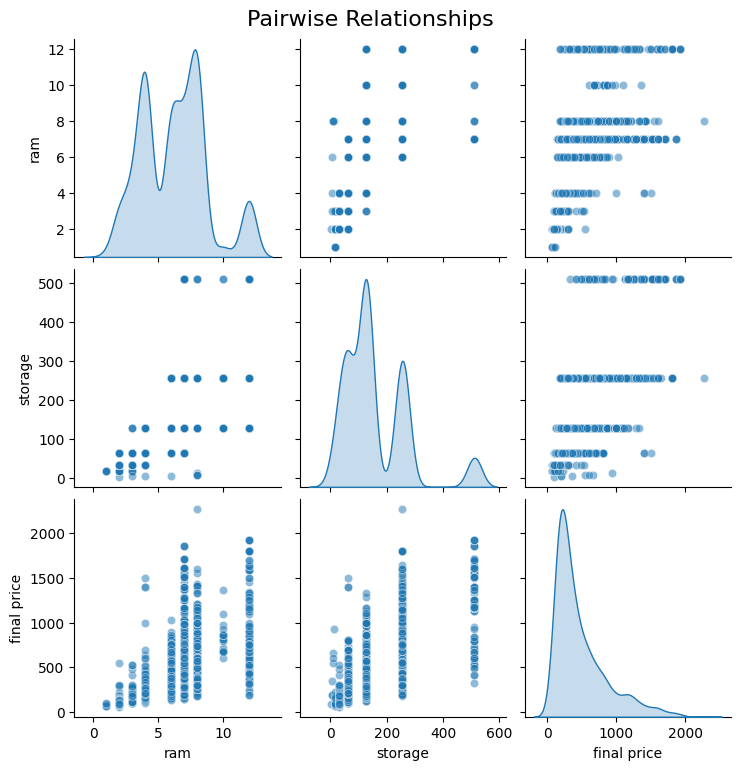

In [68]:
sns.pairplot(numeric_data, palette="coolwarm", diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)  # Title with padding
plt.show()

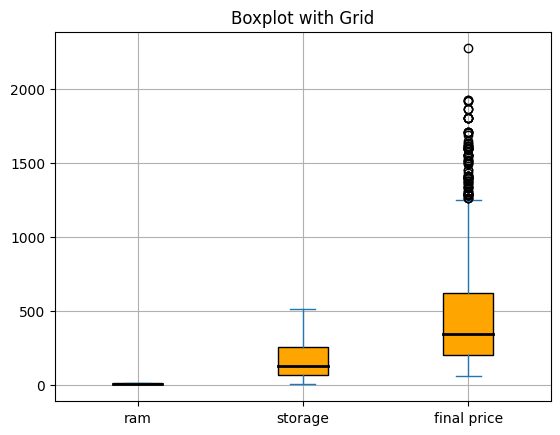

In [69]:
data.plot(kind="box", grid=True, patch_artist=True, 
        boxprops=dict(facecolor='orange', color='black'),
        medianprops=dict(color='black', linewidth=2))
plt.title("Boxplot with Grid")
plt.show()


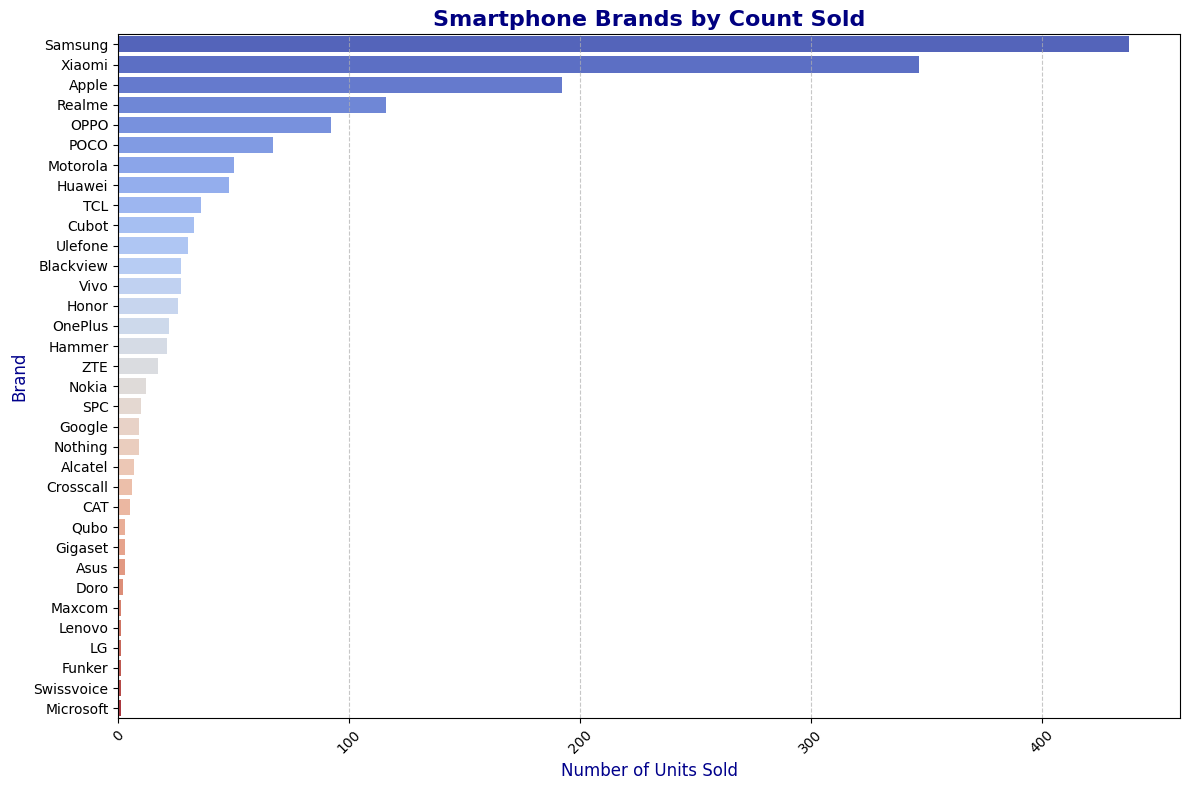

In [70]:
plt.figure(figsize=(12, 8))  # Adjusting figure size for better readability

# Creating the horizontal bar plot with a better color palette for contrast and adding more details
sns.barplot(x="count", y="brand", data=number_of_sold_brand, palette="coolwarm", ci=None)

# Adding title and labels
plt.title("Smartphone Brands by Count Sold", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Number of Units Sold", fontsize=12, color='darkblue')
plt.ylabel("Brand", fontsize=12, color='darkblue')

# Adding grid lines for better visual guidance
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed for clarity (in case you add annotations or make adjustments)
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()  # Automatically adjusts subplots to fit in the figure area
plt.show()


### Top 10 brands counting

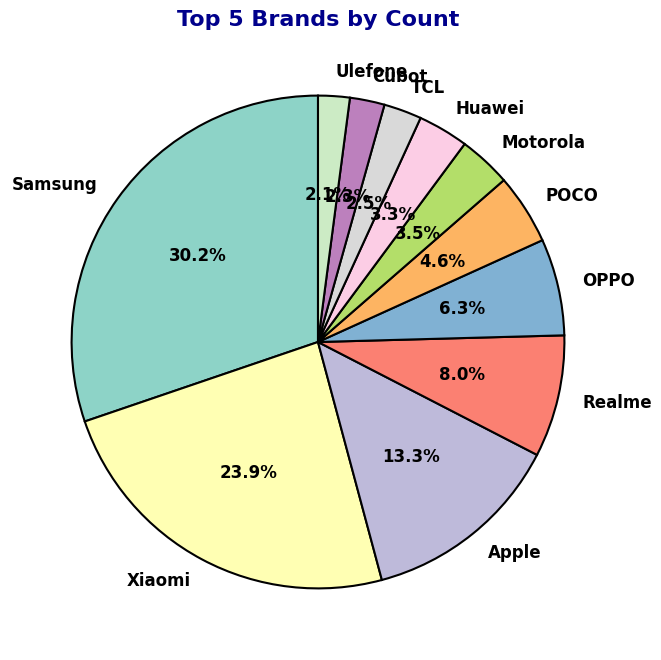

In [71]:
plt.figure(figsize=(8, 8))

# Create a pie chart with improved style and added enhancements
plt.pie(top_10_brands["count"], 
        labels=top_10_brands["brand"], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Set3", n_colors=len(top_10_brands)),  # Adding a different color palette
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Adding edge color and width for better visual separation
        textprops={'fontsize': 12, 'fontweight': 'bold'})  # Adjusting font size and weight for better readability

# Title with custom font and color
plt.title("Top 5 Brands by Count", fontsize=16, fontweight='bold', color='darkblue')

# Display the plot
plt.show()


In [72]:
number_of_sold_model = data.groupby("model").count().iloc[:, 1].reset_index(name="count").sort_values(by="count", ascending=False)

In [73]:
data.columns

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'final price'], dtype='object')

In [74]:
top_10_brands.columns

Index(['brand', 'count'], dtype='object')

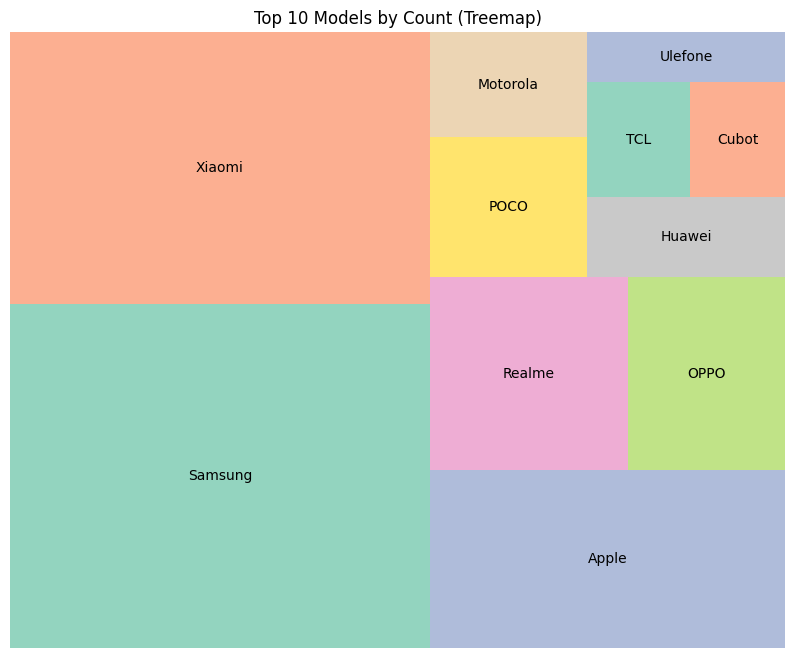

In [75]:
import squarify

plt.figure(figsize=(10, 8))

squarify.plot(sizes=top_10_brands["count"], label=top_10_brands["brand"], color=sns.color_palette("Set2", len(top_10_brands)), alpha=0.7)

plt.title("Top 10 Models by Count (Treemap)")

plt.axis('off')

plt.show()


In [76]:
group_price = data.groupby("brand")["final price"].mean().reset_index(name = "mean").sort_values(by="mean",ascending=False)

In [77]:
group_price

,brand,mean
1,Apple,831.114479
15,Lenovo,757.180000
2,Asus,751.573333
20,Nothing,657.748889
27,Samsung,639.619087
22,OnePlus,571.135909
14,LG,570.740000
17,Microsoft,552.390000
5,Crosscall,522.546667
10,Google,516.978889


# Display colors phones

In [78]:
colors = data.groupby("color").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)

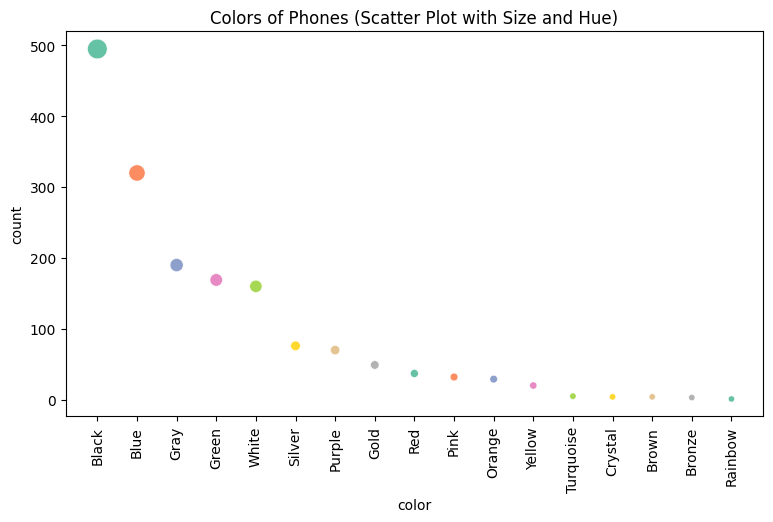

In [79]:
plt.figure(figsize=(9, 5))

# Scatter plot with count represented by size
sns.scatterplot(x="color", y="count", data=colors, hue="color", size="count", sizes=(20, 200), palette="Set2", legend=False)

plt.title("Colors of Phones (Scatter Plot with Size and Hue)")

plt.xticks(rotation=90)

plt.show()


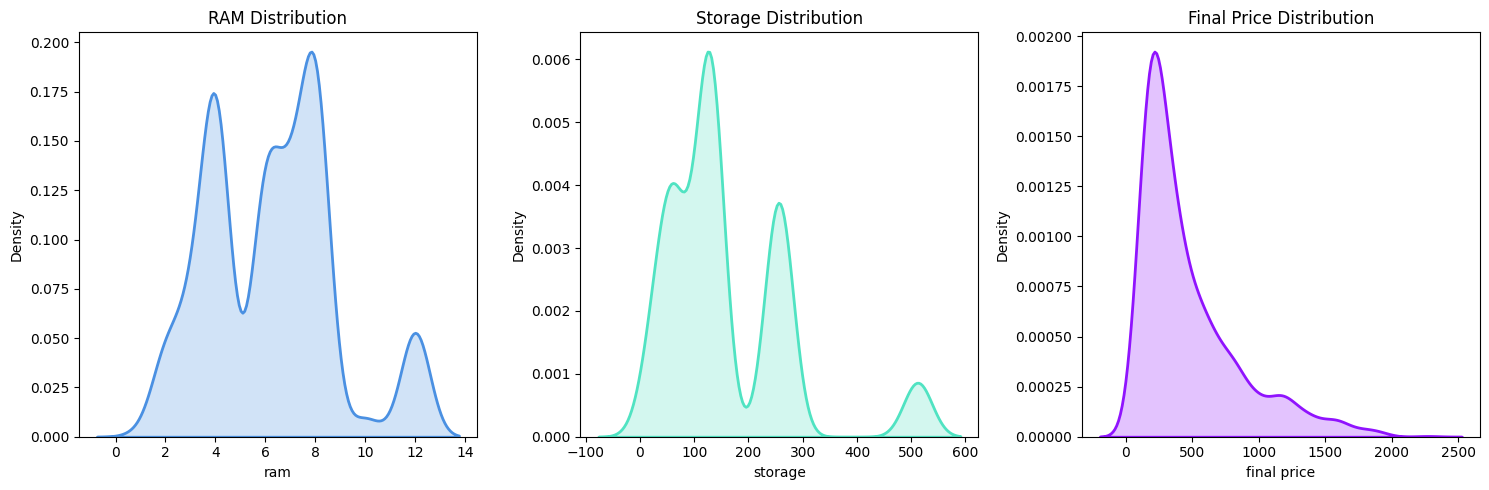

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Density plot for RAM distribution
sns.kdeplot(data["ram"], ax=axes[0], fill=True, color="#4A90E2", linewidth=2)
axes[0].set_title("RAM Distribution")

# Density plot for Storage distribution
sns.kdeplot(data["storage"], ax=axes[1], fill=True, color="#50E3C2", linewidth=2)
axes[1].set_title("Storage Distribution")

# Density plot for Final Price distribution
sns.kdeplot(data["final price"], ax=axes[2], fill=True, color="#9013FE", linewidth=2)
axes[2].set_title("Final Price Distribution")

plt.tight_layout()
plt.show()


### RAM-final_price and storage-final_price

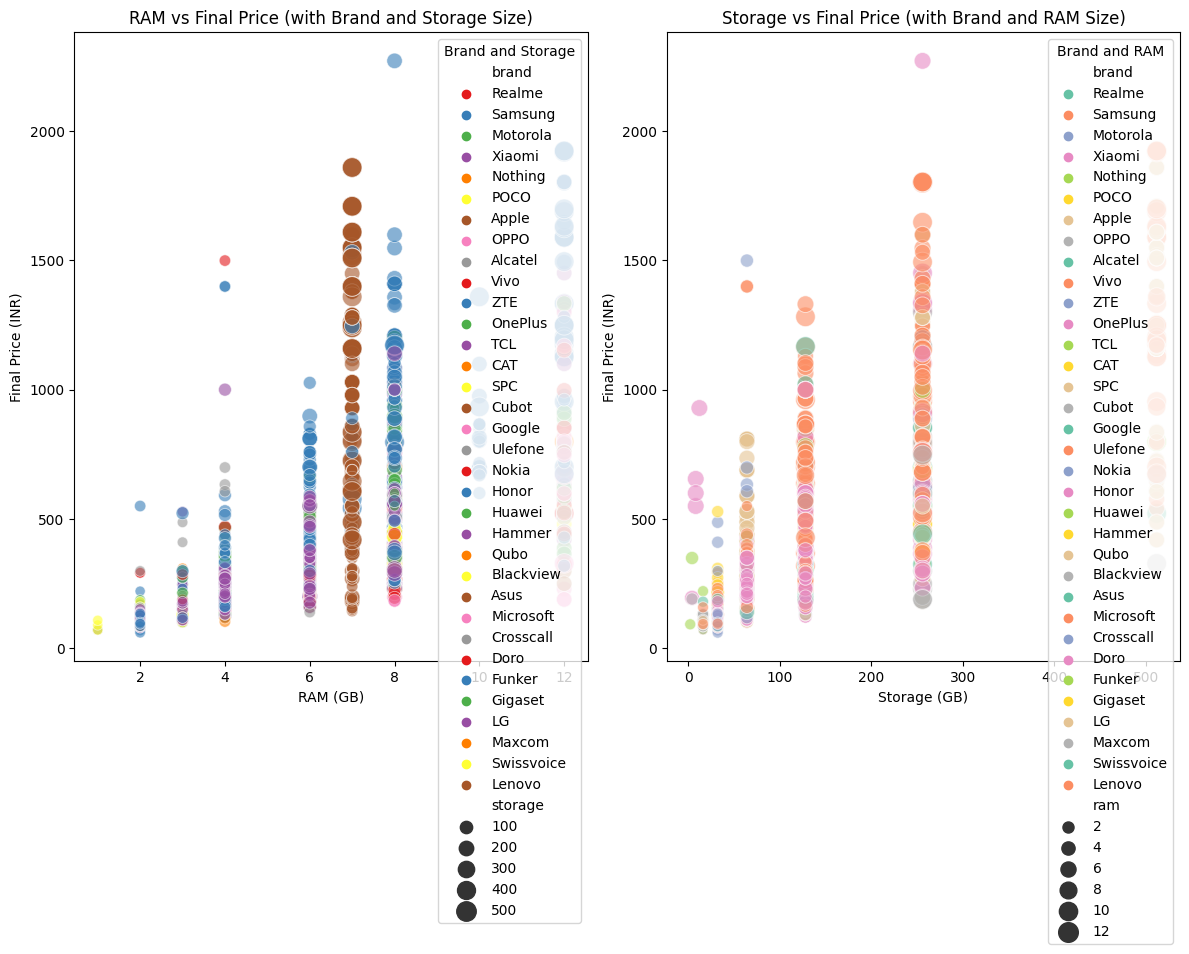

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 9))

# Scatter plot for RAM vs Final Price with color by brand and size by storage
sns.scatterplot(x="ram", y="final price", data=data, ax=axes[0],
                hue="brand", size="storage", sizes=(50, 200), palette="Set1", alpha=0.6)

axes[0].set_title("RAM vs Final Price (with Brand and Storage Size)")
axes[0].set_xlabel("RAM (GB)")
axes[0].set_ylabel("Final Price (INR)")
axes[0].legend(title="Brand and Storage")

# Scatter plot for Storage vs Final Price with color by brand and size by RAM
sns.scatterplot(x="storage", y="final price", data=data, ax=axes[1],
                hue="brand", size="ram", sizes=(50, 200), palette="Set2", alpha=0.6)

axes[1].set_title("Storage vs Final Price (with Brand and RAM Size)")
axes[1].set_xlabel("Storage (GB)")
axes[1].set_ylabel("Final Price (INR)")
axes[1].legend(title="Brand and RAM")

plt.tight_layout()
plt.show()


#### Export data

In [82]:
data.to_csv("smart_phone_preditiction.csv")